In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

### 1.Data Preparation

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2. Model Fitting

In [5]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

In [20]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Report': report
    }


Logistic Regression Evaluation:
Accuracy: 0.9737
Confusion Matrix:
[[41  2]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree Evaluation:
Accuracy: 0.9386
Confusion Matrix:
[[39  4]
 [ 3 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


KNN Evaluation:
Accuracy: 0.9474
Confusion Matrix:
[[40  3]
 [ 3 68]]
Classification Report:
              precision    recall  f1-

### 3. Ensemble Techniques

##### Voting Classifier - Hard voting

In [32]:
voting_hard = VotingClassifier(estimators=[
    ('lr', models['Logistic Regression']),
    ('dt', models['Decision Tree']),
    ('knn', models['KNN'])
], voting='hard')
voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)
acc_hard = accuracy_score(y_test, y_pred_hard)
cm_hard = confusion_matrix(y_test, y_pred_hard)
print("\nVoting Classifier (Hard Voting) Evaluation:")
print(f"Accuracy: {acc_hard:.4f}")
print("Confusion Matrix:")
print(cm_hard)
results['Voting (Hard)'] = {
    'Accuracy': acc_hard,
    'Confusion Matrix': cm_hard,
    'Report': classification_report(y_test, y_pred_hard, output_dict=True)
}


Voting Classifier (Hard Voting) Evaluation:
Accuracy: 0.9649
Confusion Matrix:
[[40  3]
 [ 1 70]]


##### Voting Classifier - Soft voting

In [33]:
voting_soft = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
], voting='soft')
voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)
acc_soft = accuracy_score(y_test, y_pred_soft)
cm_soft = confusion_matrix(y_test, y_pred_soft)
print("\nVoting Classifier (Soft Voting) Evaluation:")
print(f"Accuracy: {acc_soft:.4f}")
print("Confusion Matrix:")
print(cm_soft)
results['Voting (Soft)'] = {
    'Accuracy': acc_soft,
    'Confusion Matrix': cm_soft,
    'Report': classification_report(y_test, y_pred_soft, output_dict=True)
}


Voting Classifier (Soft Voting) Evaluation:
Accuracy: 0.9737
Confusion Matrix:
[[41  2]
 [ 1 70]]


##### Stacking Classifier

In [34]:
stack = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier()),
        ('knn', KNeighborsClassifier())
    ],
    final_estimator=LogisticRegression()
)
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)
cm_stack = confusion_matrix(y_test, y_pred_stack)
print("\nStacking Classifier Evaluation:")
print(f"Accuracy: {acc_stack:.4f}")
print("Confusion Matrix:")
print(cm_stack)
results['Stacking'] = {
    'Accuracy': acc_stack,
    'Confusion Matrix': cm_stack,
    'Report': classification_report(y_test, y_pred_stack, output_dict=True)
}


Stacking Classifier Evaluation:
Accuracy: 0.9737
Confusion Matrix:
[[41  2]
 [ 1 70]]


In [35]:
stack.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [27]:
y_pred_stack = stack.predict(X_test)

In [28]:
results['Stacking'] = {
    'Accuracy': accuracy_score(y_test, y_pred_stack),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_stack),
    'Report': classification_report(y_test, y_pred_stack, output_dict=True)
}

### 4 Visualize & Interpret

In [29]:
def plot_conf_matrix(cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

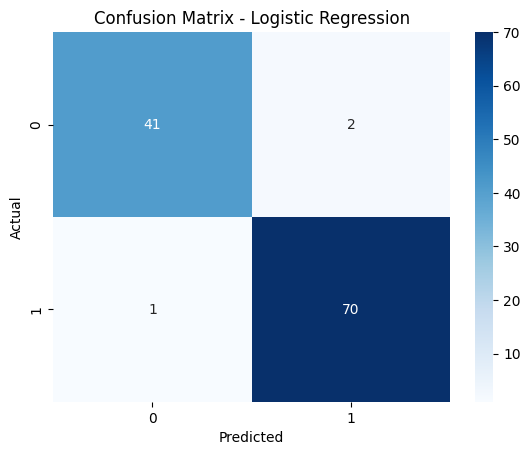

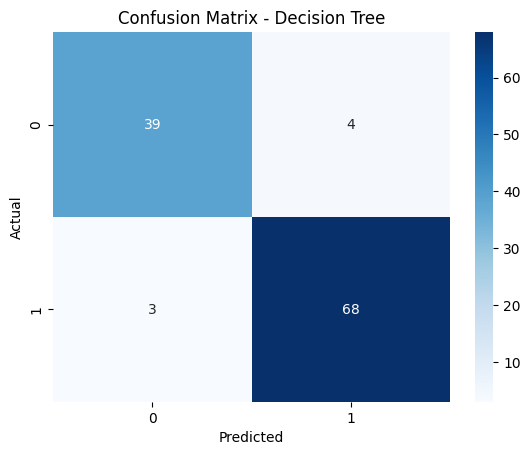

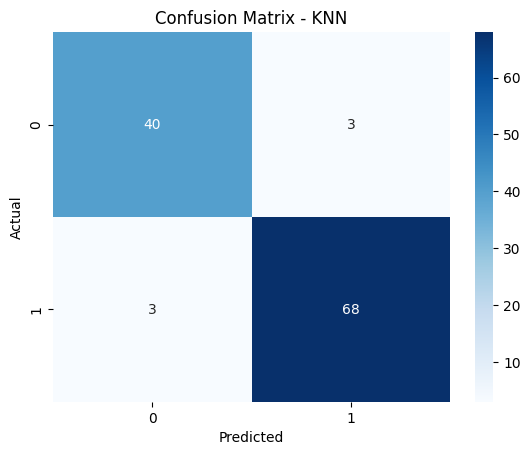

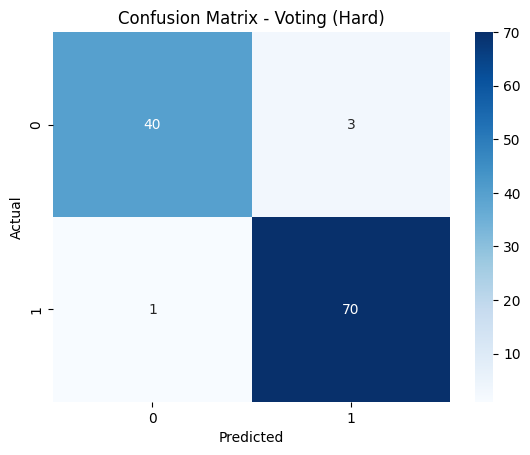

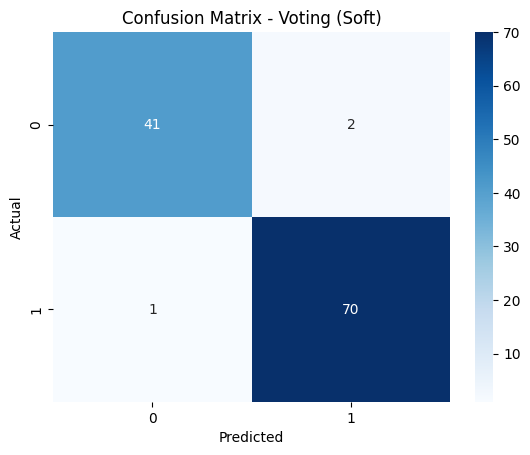

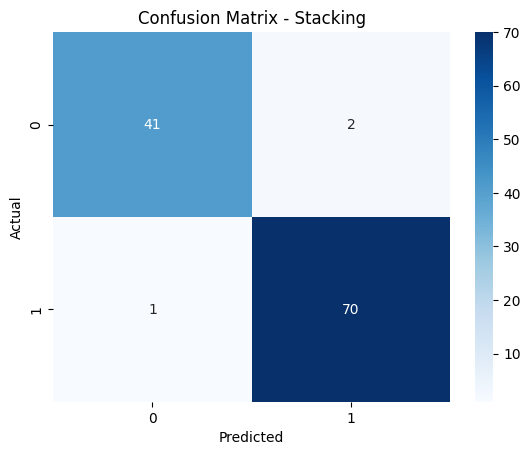

In [30]:
# Plot confusion matrices
for name, res in results.items():
    plot_conf_matrix(res['Confusion Matrix'], f'Confusion Matrix - {name}')

In [31]:
# Comparison table
comparison = pd.DataFrame({name: {'Accuracy': res['Accuracy']} for name, res in results.items()}).T
print("\nComparison Table:")
print(comparison)


Comparison Table:
                     Accuracy
Logistic Regression  0.973684
Decision Tree        0.938596
KNN                  0.947368
Voting (Hard)        0.964912
Voting (Soft)        0.973684
Stacking             0.973684
